# Objective

In this notebook we will:
    + load and merge data from different sources (in this case, data source is filesystem.)
    + preprocess data
    + create features
    + visualize feature distributions across the classes
    + write down our observations about the data

In [264]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
male_df = pd.read_csv("../data/male.csv")

In [266]:
female_df = pd.read_csv("../data/female.csv")

In [267]:
male_df.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [268]:
female_df.head()

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian


In [269]:
#join these two dataframes into one
df = male_df.append(female_df)

In [270]:
#drop 'race' column as it is 'indian' for all
df = df.drop('race',axis=1)

In [271]:
#let's checkout head 
df.head()

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m


In [272]:
#let's checkout the tail
df.tail()

,name,gender
15377,saroj devi,f
15378,naina @ geeta,f
15379,manju d/0 baboo lal jatav,f
15380,shivani,f
15381,nayna,f


In [273]:
# Preprocessing

We want to predict the gender from the first name, because the surname doesn't say anything significant about Indian
names because Indian women generally adopt their husband's surname after marriage.

Also, it is a custom for many names to have prefixes like "Shri"/"Sri"/"Mr" for Men and "Smt"/"Ms."/"Miss." for women.
Let's validate that hypothesis and remove them.

In [274]:
df.describe()

,name,gender
count,30172,30227
unique,15034,2
top,pooja,f
freq,353,15382


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 15381
Data columns (total 2 columns):
name      30172 non-null object
gender    30227 non-null object
dtypes: object(2)
memory usage: 708.4+ KB


In [276]:
df.shape

(30227, 2)

the count of name and gender doesn't match. There must be some null values for name. Let's remove those.

In [277]:
df = df[~df.name.isnull()]

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30172 entries, 0 to 15381
Data columns (total 2 columns):
name      30172 non-null object
gender    30172 non-null object
dtypes: object(2)
memory usage: 707.2+ KB


there could be duplicate names. Let's find out and remove them.

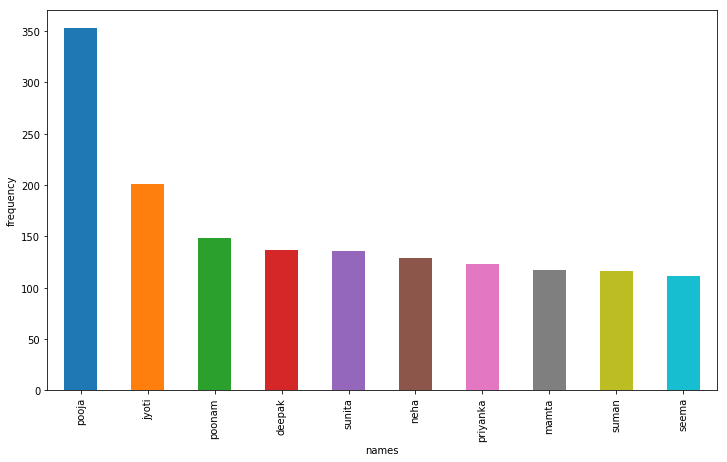

In [279]:
fig,ax = plt.subplots(figsize=(12,7))
ax = df.name.value_counts().head(10).plot(kind='bar')
ax.set_xlabel('names')
ax.set_ylabel('frequency');

In [280]:
df = df.drop_duplicates('name')

In [281]:
df.shape

(15034, 2)

In [282]:
# our dataset almost reduced by half !

In [283]:
# let's remove special characters from the names. Some names might have been written in non-ASCII encodings. 
# We need to remove those as well.

In [291]:
import re
import string
def remove_punctuation_and_numbers(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]', r'', x)
    # Removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("[" + string.punctuation + "]", "", x)
    x = re.sub(r'[0-9]+',r'',x)
    x = x.strip()
    return x

In [292]:
df['name'] = df['name'].apply(remove_punctuation_and_numbers)

In [293]:
df.name.value_counts().head()

                   112
km soniya            3
smt sunita devi      3
smt nisha            2
km reena             2
Name: name, dtype: int64

In [294]:
#let's remove names having less than 2 characters
df = df[df.name.str.len() > 2]

In [297]:
df.name.value_counts().head()

km soniya            3
smt sunita devi      3
smt  kanchan devi    2
smt prema devi       2
shan mohd            2
Name: name, dtype: int64

In [298]:
#let's see our class distribution
df.gender.value_counts()

m    8473
f    6447
Name: gender, dtype: int64

In [299]:
#let's extract prefix/firstnames from the names

In [300]:
df['firstname'] = df.name.apply(lambda x: x.strip().split(" ")[0])

In [301]:
df.firstname.value_counts().head(10)

smt       662
mohd      204
kumari    150
ram       109
km         96
md         82
pooja      61
ku         56
sanjay     50
ravi       47
Name: firstname, dtype: int64

In India, 
+ married women use the prefix *smt* or *Shrimati*,*Mrs* 
+ unmarried women use *ku*, *kum* or *kumari* 
+ *mohd* or *md* as the prefix for Muslim Men.
+ mr./kumar/kr/sri/shree/shriman/sh is a honorific for men

some more prefixes not present in the top 10 list above are:

In [302]:
df[df.firstname=='mr'].shape

(24, 3)

In [303]:
df[df.firstname=='kumar'].shape

(3, 3)

In [304]:
df[df.firstname=='kr'].shape

(2, 3)

In [305]:
df[df.firstname=='miss'].shape

(43, 3)

In [306]:
df[df.firstname=='mrs'].shape

(7, 3)

In [319]:
df[df.firstname=='kum'].shape

(8, 3)

In [307]:
df[df.firstname=='sri'].shape

(3, 3)

In [308]:
df[df.firstname=='shri'].shape

(36, 3)

In [309]:
df[df.firstname=='sh'].shape

(35, 3)

In [310]:
df[df.firstname=='shree'].shape

(8, 3)

In [311]:
df[df.firstname=='shrimati'].shape

(11, 3)

In [312]:
df[df.name.str.startswith('su shree')].shape #edge case, sushri/su shree/kumari is used for unmarried Indian women, similar to Miss.

(4, 3)

In [313]:
df[df.firstname == 'sushri'].shape

(1, 3)

In [332]:
prefix = ['mr','kumar','kr','ku','kum','kumari','km',
          'miss','mrs','mohd','md',
          'sri','shri','sh','smt','shree','shrimati','su','sushri']

These prefixes can actually be used as a feature for our model. However, we won't use it in this iteration. We want to build a model based on just the name( without prefix or suffix/surname)

In [333]:
df.head()

,name,gender,firstname
0,barjraj,m,barjraj
1,ramdin verma,m,ramdin
2,sharat chandran,m,sharat
3,birender mandal,m,birender
4,amit,m,amit


In [334]:
# keep those names whose firstname is not a prefix

df_wo_prefix = df[~df.firstname.isin(prefix)]
df_wo_prefix.head()

,name,gender,firstname
0,barjraj,m,barjraj
1,ramdin verma,m,ramdin
2,sharat chandran,m,sharat
3,birender mandal,m,birender
4,amit,m,amit


In [336]:
df_wo_prefix.firstname.value_counts().head()

ram       109
pooja      61
sanjay     50
ravi       47
deepak     43
Name: firstname, dtype: int64

In [337]:
df_wo_prefix.shape

(13485, 3)

In [339]:
# drop duplicates from firstname column
df_wo_prefix = df_wo_prefix.drop_duplicates('firstname')
df_wo_prefix.head()

,name,gender,firstname
0,barjraj,m,barjraj
1,ramdin verma,m,ramdin
2,sharat chandran,m,sharat
3,birender mandal,m,birender
4,amit,m,amit


In [340]:
df_wo_prefix.shape

(6476, 3)

In [343]:
df_wo_prefix.firstname.value_counts().head()

razim      1
chnda      1
darkash    1
seeriya    1
ravita     1
Name: firstname, dtype: int64

In [344]:
# class distribution now
df_wo_prefix.gender.value_counts()

m    3873
f    2603
Name: gender, dtype: int64

In [366]:
#drop name column
df_wo_prefix = df_wo_prefix.drop('name',axis=1)

In [374]:
df_wo_prefix.head()

,gender,firstname
0,m,barjraj
1,m,ramdin
2,m,sharat
3,m,birender
4,m,amit


In [367]:
# this is the final dataset we will be working with, let's save it to file
df_wo_prefix.to_csv('../data/names_processed.csv',index=False)

In [368]:
def extract_features(name):
    
    name = name.lower() #making sure that the name is in lower case
    
    features= {
        'first_1':name[0],
        'first_2':name[:2],
        'first_3':name[:3],
        'last_2':name[-2:],
        'last_1': name[-1],
        'length': len(name)
    }
    
    return features

In [369]:
extract_features('amit')

{'first_1': 'a',
 'first_2': 'am',
 'first_3': 'ami',
 'last_1': 't',
 'last_2': 'it',
 'length': 4}

In [371]:
features = (df_wo_prefix
            .firstname
            .apply(extract_features)
            .values
            .tolist())

In [372]:
features_df = pd.DataFrame(features)

In [373]:
features_df.head()

,first_1,first_2,first_3,last_1,last_2,length
0,b,ba,bar,j,aj,7
1,r,ra,ram,n,in,6
2,s,sh,sha,t,at,6
3,b,bi,bir,r,er,8
4,a,am,ami,t,it,4


In [376]:
# let's append our gender column here
features_df['gender'] = df_wo_prefix['gender'].values

In [377]:
features_df.head()

,first_1,first_2,first_3,last_1,last_2,length,gender
0,b,ba,bar,j,aj,7,m
1,r,ra,ram,n,in,6,m
2,s,sh,sha,t,at,6,m
3,b,bi,bir,r,er,8,m
4,a,am,ami,t,it,4,m


In [382]:
# let's analyse the features now.

In [383]:
# Question: how does the length of names differ between male and female?

In [497]:
freq = features_df['length'].value_counts() # frequency of lengths

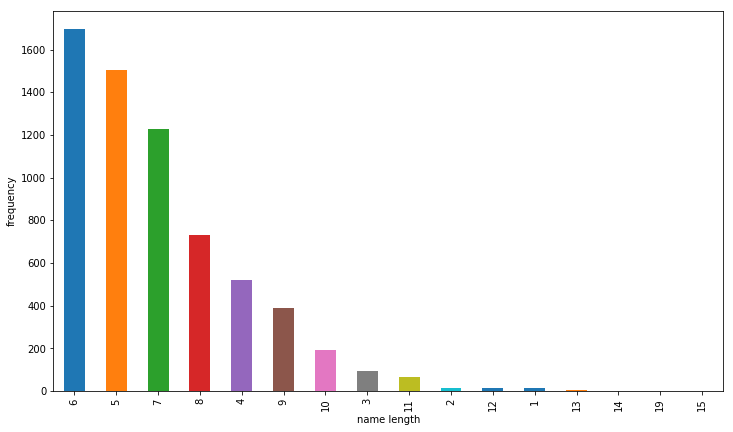

In [498]:
fig,ax = plt.subplots(figsize=(12,7))
ax = freq.plot(kind='bar');
ax.set_xlabel('name length');
ax.set_ylabel('frequency');

Majority of name lengths lie between 5-7 characters. By name, we refer to 'firstname' here and will be referred to as same henceforth.

In [436]:
male_name_lengths = features_df.loc[features_df.gender=='m','length']
male_name_lengths_freq = male_name_lengths.value_counts()
male_name_lengths_freq

5     946
6     946
7     649
8     457
4     298
9     274
10    143
3      73
11     46
12     13
2      12
1       8
13      4
14      2
19      1
15      1
Name: length, dtype: int64

In [437]:
female_name_lengths = features_df.loc[features_df.gender=='f','length']
female_name_lengths_freq = female_name_lengths.value_counts()
female_name_lengths_freq

6     752
7     579
5     558
8     276
4     222
9     113
10     49
3      23
11     20
1       4
2       4
12      2
13      1
Name: length, dtype: int64

In [470]:
length_freq_long = (features_df
                    .groupby(['gender','length'])['length']
                    .agg({'length': 'count'})
                    .rename(columns={'gender':'gender','length':'freq'})
                    .reset_index())

/home/skd/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [471]:
length_freq_long.head()

,gender,length,freq
0,f,1,4
1,f,2,4
2,f,3,23
3,f,4,222
4,f,5,558


In [472]:
length_freq_wide = length_freq_long.pivot(index='length',columns='gender',values='freq')

In [477]:
length_freq_wide = length_freq_wide.fillna(0)

In [481]:
length_freq_wide = length_freq_wide.astype('int')

In [483]:
length_freq_wide

gender,f,m
length,,
1,4,8
2,4,12
3,23,73
4,222,298
5,558,946
6,752,946
7,579,649
8,276,457
9,113,274


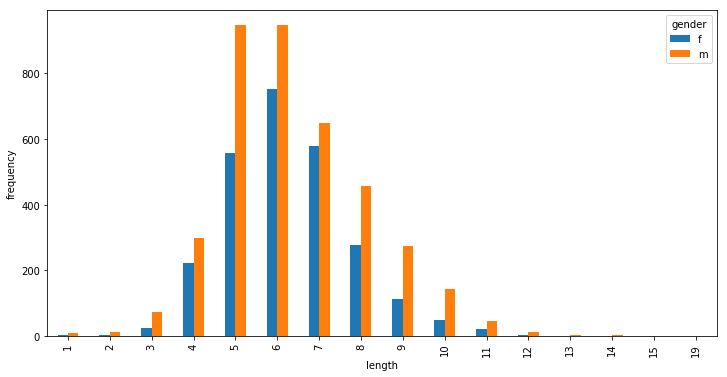

In [500]:
fig,ax = plt.subplots(figsize=(12,6))
ax = length_freq_wide.plot(kind='bar',ax=ax)
ax.set_ylabel('frequency');

In [503]:
length_freq_wide.m.mean(),length_freq_wide.m.std()

(242.0625, 334.12043113224905)

In [504]:
length_freq_wide.f.mean(),length_freq_wide.f.std()

(162.6875, 249.02870483808354)

So does gender and name lengths have any relationship?

## Hypothesis

H0 : gender and name lengths are independent

Ha : gender and name lenghts are dependent

## significance level

For this test, let's keep the significance level as 0.05



In [512]:
from scipy.stats.mstats import normaltest
print('m: ',normaltest(length_freq_wide.m))
print('f: ',normaltest(length_freq_wide.f))

m:  NormaltestResult(statistic=6.0239429123292751, pvalue=0.049194598103077872)
f:  NormaltestResult(statistic=7.3402476658995148, pvalue=0.02547331531558578)


/home/skd/miniconda3/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2191: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  np.min(n))


the p-value for both male and female name lengths are much less than the Chi-Square test statistics, hence null hypothesis is rejected.

**This means that there's a relationship between name length and gender.**